# Predictive Analysis

In this notebook, I Use dataset Similar to [dataset](https://www.kaggle.com/mashlyn/online-retail-ii-uci) to build an unsupervised machine learning model which allows one to estimate if a given customer will buy something again from the online shop in the next quarter.

<a id="importing-relevant-python-packages"></a>
## Importing Relevant Python Packages

In [ ]:
# importing necessary Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
#import plotly.offline as pyoff
import plotly.graph_objs as go
#import plotly.figure_factory as ff

# avoid displaying warnings
import warnings
warnings.filterwarnings("ignore")

#import machine learning related libraries
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.cluster import KMeans
import xgboost as xgb
import time




<a id='importing-relevant-data'></a>
## Importing Relevant Data

In [ ]:
# Loading the data
from google.colab import files
uploaded = files.upload()




Saving Deliv Data.csv to Deliv Data.csv


In [ ]:
import io

df_data = pd.read_csv(io.BytesIO(uploaded['Deliv Data.csv']))



In [ ]:
df_data.shape

(26941, 17)

In [ ]:
df_data.head(5)

,Delivery,Order Creation Date,Weeks,Date Processed,Loading DC,Ship To Party,Customer Name,Location,Branch,Distance (Km),Quantity (Cases),Vehicle Capacity (Tons),OBD Weight (Tons),Volume,OBD Volume (CBM),NPS Value,Shipment Number
0,7062991645,1/2/2023,WEEK 1,1/4/2023,OWERGA,6319778,li Ba,Maiduguri,North East,1705,4200.0,45 Tons,40.349100,57176.700,57.176700,50490462,N300071424
1,7063377447,1/2/2023,WEEK 1,1/3/2023,GBAR,3538099,MIR I,Kano,North West,1186,4688.0,45 Tons,38.116640,70104.528,70.104528,51002096,N300071413
2,7063439386,1/2/2023,WEEK 1,1/3/2023,GBAR,2572238,c Don,Abuja,North Central,803,3247.0,30 Tons,23.032470,58009.061,58.009061,38567877.3,N300071419
3,7063467048,1/2/2023,WEEK 1,1/3/2023,GBAR,5216365,manue,Lokoja,North Central,570,4659.0,45 Tons,34.248185,71455.759,71.455759,52015937.42,N300071408
4,7063467652,1/2/2023,WEEK 1,1/3/2023,GBAR,4336604,hida,Minna,North Central,678,3425.0,30 Tons,24.529590,57030.420,57.030420,39423584.9,N300071411


<a id='data-engineering'></a>
## Data Engineering

In this section, we will explore the given dataset to answer some general questions about the dataset. This will lead to cause us to introduce other features into the dataset which will help us to build a machine learning model that will help us to answer our main question.

We can check information about the dataframe with the `info` method.

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26941 entries, 0 to 26940
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery                 26941 non-null  int64  
 1   Order Creation Date      26941 non-null  object 
 2   Weeks                    26941 non-null  object 
 3   Date Processed           26941 non-null  object 
 4   Loading DC               26941 non-null  object 
 5   Ship To Party            26941 non-null  int64  
 6   Customer Name            26941 non-null  object 
 7   Location                 26941 non-null  object 
 8   Branch                   26941 non-null  object 
 9   Distance (Km)            26941 non-null  object 
 10  Quantity (Cases)         26927 non-null  float64
 11  Vehicle Capacity (Tons)  26937 non-null  object 
 12  OBD Weight (Tons)        26941 non-null  float64
 13  Volume                   26941 non-null  float64
 14  OBD Volume (CBM)      

From the output of the `info` method, we can see that Non of the data point have missing values. Also we may want to change the data type of the objects in the __Date Processed__ column to proper date objects with the `to_datetime` method.

Let check if there is missing values in each column of the dataframe.

In [ ]:
df_data.isnull().sum()

,0
Delivery,0
Order Creation Date,0
Weeks,0
Date Processed,0
Loading DC,0
Ship To Party,0
Customer Name,0
Location,0
Branch,0
Distance (Km),0


In [ ]:
df_data = df_data.dropna()
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26877 entries, 0 to 26940
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery                 26877 non-null  int64  
 1   Order Creation Date      26877 non-null  object 
 2   Weeks                    26877 non-null  object 
 3   Date Processed           26877 non-null  object 
 4   Loading DC               26877 non-null  object 
 5   Ship To Party            26877 non-null  int64  
 6   Customer Name            26877 non-null  object 
 7   Location                 26877 non-null  object 
 8   Branch                   26877 non-null  object 
 9   Distance (Km)            26877 non-null  object 
 10  Quantity (Cases)         26877 non-null  float64
 11  Vehicle Capacity (Tons)  26877 non-null  object 
 12  OBD Weight (Tons)        26877 non-null  float64
 13  Volume                   26877 non-null  float64
 14  OBD Volume (CBM)         26

Next, we update the dataframe `df_data` by converting the date field, __Date Processed__ to _datetime_ object. One can use the `to_datetime` method to achieve this.

In [ ]:
df_data['Date Processed'] = pd.to_datetime(df_data['Date Processed'])
df_data.head()

,Delivery,Order Creation Date,Weeks,Date Processed,Loading DC,Ship To Party,Customer Name,Location,Branch,Distance (Km),Quantity (Cases),Vehicle Capacity (Tons),OBD Weight (Tons),Volume,OBD Volume (CBM),NPS Value,Shipment Number
0,7062991645,1/2/2023,WEEK 1,2023-01-04,OWERGA,6319778,li Ba,Maiduguri,North East,1705,4200.0,45 Tons,40.349100,57176.700,57.176700,50490462,N300071424
1,7063377447,1/2/2023,WEEK 1,2023-01-03,GBAR,3538099,MIR I,Kano,North West,1186,4688.0,45 Tons,38.116640,70104.528,70.104528,51002096,N300071413
2,7063439386,1/2/2023,WEEK 1,2023-01-03,GBAR,2572238,c Don,Abuja,North Central,803,3247.0,30 Tons,23.032470,58009.061,58.009061,38567877.3,N300071419
3,7063467048,1/2/2023,WEEK 1,2023-01-03,GBAR,5216365,manue,Lokoja,North Central,570,4659.0,45 Tons,34.248185,71455.759,71.455759,52015937.42,N300071408
4,7063467652,1/2/2023,WEEK 1,2023-01-03,GBAR,4336604,hida,Minna,North Central,678,3425.0,30 Tons,24.529590,57030.420,57.030420,39423584.9,N300071411


In [ ]:
pd.DataFrame(df_data['Date Processed'].describe())

,Date Processed
count,26877
mean,2023-08-23 11:10:53.778323200
min,2023-01-02 00:00:00
25%,2023-04-30 00:00:00
50%,2023-08-25 00:00:00
75%,2023-12-17 00:00:00
max,2024-03-30 00:00:00


From the above, we see that the Delivery made by customers was from 02-01-2023 to 30-03-2024

In the subsequent cells, we will answer some questions we would like to know from the given dataset.

<a id='exp-qxn-1'></a>
### Exploration
> How many customers are there in the dataset and what is their Location?

In [ ]:
print('From the dataset, MH MART Limited has {} customers from {} different Locations in the Country.'.format(
    len(df_data['Ship To Party'].unique()), len(df_data['Location'].unique())))

From the dataset, MH MART Limited has 430 customers from 134 different Locations in the Country.


<a id='exp-qxn-2'></a>

> What are the Locations that are most represented in the dataset?

In [ ]:
LOC_df = df_data.groupby(['Ship To Party', 'Location']).size().reset_index(name='Count')
LOC_df = LOC_df.groupby('Location')['Ship To Party'].nunique().reset_index(name='Unique Customers')
LOC_df = LOC_df.sort_values(by='Unique Customers', ascending=False)
total_customers = LOC_df['Unique Customers'].sum()
LOC_df['Percentage'] = (LOC_df['Unique Customers'] / total_customers) * 100
LOC_df['Percentage'] = LOC_df['Percentage'].round(2)  # Round to 2 decimal places
top_locations = LOC_df.head(20)
print(top_locations)

          Location  Unique Customers  Percentage
78           Lagos                48       11.14
7            Abuja                37        8.58
112  Port Harcourt                29        6.73
45          Ibadan                13        3.02
69          Kaduna                12        2.78
53           Ikeja                12        2.78
25           Benin                12        2.78
70            Kano                10        2.32
39           Enugu                 8        1.86
67             Jos                 8        1.86
3              Aba                 7        1.62
60          Ilorin                 7        1.62
17           Asaba                 6        1.39
5         Abeokuta                 6        1.39
85           Minna                 5        1.16
80           Lekki                 5        1.16
110         Owerri                 5        1.16
102        Onitsha                 5        1.16
116      Sango Ota                 4        0.93
114         SOKOTO  

The output above, shows the top $20$ LOCATIONS of MH MART LIMITED  Customers across the Country in the past year till today

In [ ]:
Branch_df = df_data.groupby(['Ship To Party', 'Branch']).size().reset_index(name='Count')
Branch_df = Branch_df.groupby('Branch')['Ship To Party'].nunique().reset_index(name='No of Customers')
Branch_df = Branch_df.sort_values(by='No of Customers', ascending=False)
total_customers = Branch_df['No of Customers'].sum()
Branch_df['Percentage'] = (Branch_df['No of Customers'] / total_customers) * 100
Branch_df['Percentage'] = Branch_df['Percentage'].round(2)  # Round to 2 decimal places
Branch = Branch_df
print(Branch)

                 Branch  No of Customers  Percentage
1          Modern Trade              138       32.02
0                 Lagos               57       13.23
10           South West               55       12.76
4         North Central               47       10.90
6            North West               31        7.19
9           South South               28        6.50
8            South East               27        6.26
5            North East               22        5.10
2             N Profess               21        4.87
7   South Branch Waters                3        0.70
3   North Branch Waters                2        0.46


<a id='exp-qxn-3'></a>
### Exploration
> Calculate the  total NPS made in each month and what is the percentage NPS based on Branch?

In [ ]:
df_data['InvoiceYearMonth'] = df_data['Date Processed'].map(lambda date: 100*date.year + date.month)
df_data.head()

,Delivery,Order Creation Date,Weeks,Date Processed,Loading DC,Ship To Party,Customer Name,Location,Branch,Distance (Km),Quantity (Cases),Vehicle Capacity (Tons),OBD Weight (Tons),Volume,OBD Volume (CBM),NPS Value,Shipment Number,InvoiceYearMonth
0,7062991645,1/2/2023,WEEK 1,2023-01-04,OWERGA,6319778,li Ba,Maiduguri,North East,1705,4200.0,45 Tons,40.349100,57176.700,57.176700,50490462,N300071424,202301
1,7063377447,1/2/2023,WEEK 1,2023-01-03,GBAR,3538099,MIR I,Kano,North West,1186,4688.0,45 Tons,38.116640,70104.528,70.104528,51002096,N300071413,202301
2,7063439386,1/2/2023,WEEK 1,2023-01-03,GBAR,2572238,c Don,Abuja,North Central,803,3247.0,30 Tons,23.032470,58009.061,58.009061,38567877.3,N300071419,202301
3,7063467048,1/2/2023,WEEK 1,2023-01-03,GBAR,5216365,manue,Lokoja,North Central,570,4659.0,45 Tons,34.248185,71455.759,71.455759,52015937.42,N300071408,202301
4,7063467652,1/2/2023,WEEK 1,2023-01-03,GBAR,4336604,hida,Minna,North Central,678,3425.0,30 Tons,24.529590,57030.420,57.030420,39423584.9,N300071411,202301


In [ ]:
# Convert 'NPS Value' to numeric before calculations
df_data['NPS Value'] = pd.to_numeric(df_data['NPS Value'], errors='coerce')
# Calculate the total NPS made in each month
nps_by_month = df_data.groupby('InvoiceYearMonth')['NPS Value'].sum().reset_index()
print(nps_by_month)
# Calculate the percentage NPS based on Branch
branch_nps = df_data.groupby('Branch')['NPS Value'].sum().reset_index()
total_nps = branch_nps['NPS Value'].sum()
branch_nps['Percentage NPS'] = (branch_nps['NPS Value'] / total_nps) * 100


# Round the percentage to a whole number
branch_nps['Percentage NPS'] = branch_nps['Percentage NPS'].round(2).astype(int)

# Remove South Branch Waters and North Branch Waters
branch_nps = branch_nps[~branch_nps['Branch'].isin(['South Branch Waters', 'North Branch Waters'])]

# Sort the table in ascending order
branch_nps = branch_nps.sort_values(by='Percentage NPS')

# Display the table
print(branch_nps)

# Create a donut chart with fine color fills
fig = px.pie(branch_nps, values='Percentage NPS', names='Branch', hole=0.6,
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Percentage NPS by Branch', title_x=0.5)
fig.show()


    InvoiceYearMonth     NPS Value
0             202301  4.653499e+10
1             202302  4.279394e+10
2             202303  4.618700e+10
3             202304  4.427723e+10
4             202305  4.541130e+10
5             202306  4.821882e+10
6             202307  4.613675e+10
7             202308  4.842699e+10
8             202309  4.865220e+10
9             202310  4.935831e+10
10            202311  5.928595e+10
11            202312  5.187128e+10
12            202401  6.318106e+10
13            202402  6.606702e+10
14            202403  8.003698e+10
           Branch     NPS Value  Percentage NPS
2       N Profess  3.373385e+09               0
1    Modern Trade  3.593104e+10               4
9     South South  6.807972e+10               8
8      South East  8.566545e+10              10
4   North Central  9.599707e+10              12
10     South West  9.449340e+10              12
0           Lagos  1.075101e+11              13
6      North West  1.380400e+11              17
5      N

In [ ]:
# Convert 'Order quantity' to numeric before calculations
df_data['Quantity (Cases)'] = pd.to_numeric(df_data['Quantity (Cases)'], errors='coerce')

# Calculate the total order quatity made in each month
Order_quantity_by_month = df_data.groupby('InvoiceYearMonth')['Quantity (Cases)'].sum().reset_index()
# Display the table
print(Order_quantity_by_month)
# Calculate the percentage Order quantity  based on Branch
branch_quatity = df_data.groupby('Branch')['Quantity (Cases)'].sum().reset_index()
total_quantity = branch_quatity['Quantity (Cases)'].sum()
branch_quatity['Percentage Quantity'] = (branch_quatity['Quantity (Cases)'] / total_quantity) * 100


# Round the percentage to a whole number
branch_quatity['Percentage Quantity'] = branch_quatity['Percentage Quantity'].round(2).astype(int)

# Remove South Branch Waters and North Branch Waters
branch_quatity = branch_quatity[~branch_quatity['Branch'].isin(['South Branch Waters', 'North Branch Waters'])]

# Sort the table in ascending order
branch_quatity = branch_quatity.sort_values(by='Percentage Quantity')

# Display the table
print(branch_quatity)

# Create a donut chart with fine color fills
fig = px.pie(branch_quatity, values='Percentage Quantity', names='Branch', hole=0.6,
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Percentage Order Quantity by Branch', title_x=0.5)
fig.show()

    InvoiceYearMonth  Quantity (Cases)
0             202301         3939334.0
1             202302         3573599.0
2             202303         3654779.0
3             202304         3553783.0
4             202305         3568016.0
5             202306         3787963.0
6             202307         3576320.0
7             202308         3484937.0
8             202309         3495806.0
9             202310         3421909.0
10            202311         3465902.0
11            202312         3365836.0
12            202401         3747905.0
13            202402         3780498.0
14            202403         3886759.0
           Branch  Quantity (Cases)  Percentage Quantity
2       N Profess          184278.0                    0
1    Modern Trade         2151042.0                    3
8      South East         5373486.0                    9
9     South South         4996880.0                    9
10     South West         6287804.0                   11
0           Lagos         6625704.

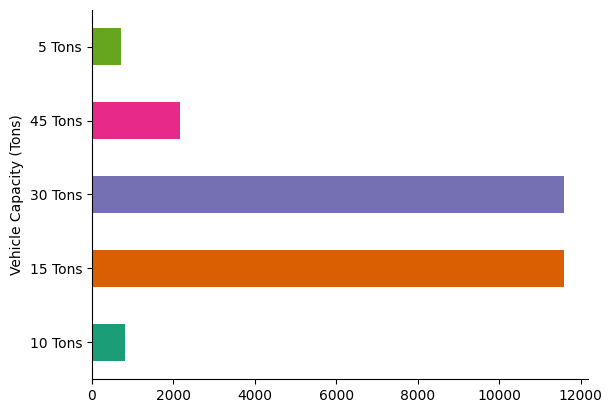

In [ ]:
# @title Vehicle Capacity (Tons)

from matplotlib import pyplot as plt
import seaborn as sns
filtered_data = df_data[(df_data['Vehicle Capacity (Tons)'] != "0") & (df_data['Vehicle Capacity (Tons)'] != "1 Tons")]
filtered_data.groupby('Vehicle Capacity (Tons)').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_data['NPS Value'] = pd.to_numeric(df_data['NPS Value'], errors='coerce')
ctm_NPS = df_data.groupby('InvoiceYearMonth')['NPS Value'].sum().reset_index()
ctm_NPS['NPS Value'] = ctm_NPS['NPS Value'].round(0).astype(int)
print(ctm_NPS)



    InvoiceYearMonth    NPS Value
0             202301  46534987560
1             202302  42793940561
2             202303  46186999426
3             202304  44277226363
4             202305  45411303459
5             202306  48218817241
6             202307  46136753370
7             202308  48426991962
8             202309  48652200368
9             202310  49358308542
10            202311  59285946914
11            202312  51871280200
12            202401  63181060890
13            202402  66067022585
14            202403  80036975820


In [ ]:
pd.DataFrame(ctm_NPS['NPS Value'].describe())

,NPS Value
count,1.500000e+01
mean,5.242932e+10
std,1.031779e+10
min,4.279394e+10
25%,4.616188e+10
50%,4.842699e+10
75%,5.557861e+10
max,8.003698e+10


In [ ]:
# plot line plot
line_fig = px.line(ctm_NPS,
                   x = "InvoiceYearMonth",
                   y = "NPS Value",
                   title = "Montly NPS from JAN, 2023 to MAR, 2024",
                   template= "plotly_dark"
                  )

line_fig.update_layout(title_x=0.5,
                       showlegend=False,
                       xaxis={"type": "category"},
                       xaxis_title="Invoice Year-Month",
                       yaxis_title="Monthly NPS"
                      )

line_fig.show(config={'displaylogo': False})

In [ ]:
Cus_NPS_df = df_data.groupby(['Customer Name'])['NPS Value'].sum().reset_index().sort_values(by='NPS Value', ascending=False)

total_NPS = Cus_NPS_df['NPS Value'].sum()
Cus_NPS_df['Percentage'] = np.round(Cus_NPS_df['NPS Value'] / total_NPS * 100, 2)

Cus_NPS_df.head(10)


,Customer Name,NPS Value,Percentage
144,hamma,3.215968e+10,4.09
4,E. C,2.092566e+10,2.66
2,A. O,2.025415e+10,2.58
78,adu A,2.023922e+10,2.57
59,MIR I,1.802808e+10,2.29
141,haji,1.737591e+10,2.21
145,heem,1.478610e+10,1.88
34,D Bas,1.356593e+10,1.72
163,kemx,1.227385e+10,1.56
110,ddt N,1.126345e+10,1.43


From the output above, the top $10$ Customers with respect to NPS generated

In [ ]:

def format_currency(n):
    return f"${n:,.2f}"

Cus_NPS_df = df_data.groupby(['Customer Name'])['NPS Value'].sum().reset_index().sort_values(by='NPS Value', ascending=False)

total_NPS = Cus_NPS_df['NPS Value'].sum()

Cus_NPS_df['Percentage'] = np.round(Cus_NPS_df['NPS Value'] / total_NPS * 100, 2)

Cus_NPS_df['NPS Value'] = Cus_NPS_df['NPS Value'].map(format_currency)

Cus_NPS_df.head(10)


,Customer Name,NPS Value,Percentage
144,hamma,"$32,159,681,748.76",4.09
4,E. C,"$20,925,664,339.78",2.66
2,A. O,"$20,254,150,390.51",2.58
78,adu A,"$20,239,215,389.34",2.57
59,MIR I,"$18,028,078,245.82",2.29
141,haji,"$17,375,910,164.66",2.21
145,heem,"$14,786,096,254.46",1.88
34,D Bas,"$13,565,930,140.51",1.72
163,kemx,"$12,273,848,767.21",1.56
110,ddt N,"$11,263,445,974.72",1.43


<a id='predicting-customer-purchase'></a>
## Predicting Customer Purchase

The goal of this section is to come up with a model using the given dataframe `df_data`, to estimate when a given customer is to buy or next purchasing date from MH MART LIMITED

The dataframe is split into two.

* The first sub-dataframe assigned to the Python variable `ctm_bhvr_dt` contains purchases made by customers from `02-01-2023` to `31-12-2023`. This dataframe will be used to study the behavioural purchases of the customers.

* The second sub-dataframe assigned to the Python variable `ctm_next_quarter` will be used to study the behavioural purchases of the customers in the next quarter. That is, from `02-01-2024` to `31-03-2024`.


In [ ]:
df_data.head()

,Delivery,Order Creation Date,Weeks,Date Processed,Loading DC,Ship To Party,Customer Name,Location,Branch,Distance (Km),Quantity (Cases),Vehicle Capacity (Tons),OBD Weight (Tons),Volume,OBD Volume (CBM),NPS Value,Shipment Number,InvoiceYearMonth
0,7062991645,1/2/2023,WEEK 1,2023-01-04,OWERGA,6319778,li Ba,Maiduguri,North East,1705,4200.0,45 Tons,40.349100,57176.700,57.176700,50490462.00,N300071424,202301
1,7063377447,1/2/2023,WEEK 1,2023-01-03,GBAR,3538099,MIR I,Kano,North West,1186,4688.0,45 Tons,38.116640,70104.528,70.104528,51002096.00,N300071413,202301
2,7063439386,1/2/2023,WEEK 1,2023-01-03,GBAR,2572238,c Don,Abuja,North Central,803,3247.0,30 Tons,23.032470,58009.061,58.009061,38567877.30,N300071419,202301
3,7063467048,1/2/2023,WEEK 1,2023-01-03,GBAR,5216365,manue,Lokoja,North Central,570,4659.0,45 Tons,34.248185,71455.759,71.455759,52015937.42,N300071408,202301
4,7063467652,1/2/2023,WEEK 1,2023-01-03,GBAR,4336604,hida,Minna,North Central,678,3425.0,30 Tons,24.529590,57030.420,57.030420,39423584.90,N300071411,202301


In [ ]:

# Filter data for the current quarter (Jan 1, 2023, to Dec 31, 2023)
ctm_bhvr_dt = df_data[(df_data['Date Processed'] < pd.Timestamp(2024, 1, 1)) &
                      (df_data['Date Processed'] >= pd.Timestamp(2023, 1, 1))].reset_index(drop=True)

# Filter data for the next quarter (Jan 1, 2024, to Mar 30, 2024)
ctm_next_quarter = df_data[(df_data['Date Processed'] < pd.Timestamp(2024, 3, 30)) &
                           (df_data['Date Processed'] >= pd.Timestamp(2024, 1, 1))].reset_index(drop=True)


In [ ]:
# Get the distinct customers in the dataframe ctm_bhvr_dt
ctm_dt = pd.DataFrame(ctm_bhvr_dt['Ship To Party'].unique())

# Rename the column to CustomerID.
ctm_dt.columns = ['Ship To Code']

ctm_dt.head()

,Ship To Code
0,6319778
1,3538099
2,2572238
3,5216365
4,4336604


first purchase made by each customer in the next quarter.

In [ ]:
# Create a dataframe with Ship To Party and customers first purchase
# date in ctm_next_quarter
ctm_1st_purchase_in_next_quarter = ctm_next_quarter.groupby('Ship To Party')['Date Processed'].min().reset_index()
ctm_1st_purchase_in_next_quarter.columns = ['Ship To Code','MinPurchaseDate']
ctm_1st_purchase_in_next_quarter.head()

,Ship To Code,MinPurchaseDate
0,2099370,2024-01-11
1,2099371,2024-01-06
2,2099380,2024-02-12
3,2099400,2024-01-03
4,2099404,2024-01-03


Last purchase made by each customer in the dataframe `ctm_bhvr_dt`.

In [ ]:
ctm_last_purchase_bhvr_dt = ctm_bhvr_dt.groupby('Ship To Party')['Date Processed'].max().reset_index()
ctm_last_purchase_bhvr_dt.columns = ['Ship To Code','MaxPurchaseDate']
ctm_last_purchase_bhvr_dt.head()

,Ship To Code,MaxPurchaseDate
0,2099370,2023-12-24
1,2099371,2023-12-23
2,2099380,2023-12-29
3,2099400,2023-12-24
4,2099404,2023-12-24


Let's merge the two dataframes `ctm_last_purchase_bhvr_dt` and `ctm_1st_purchase_in_next_quarter`.

In [ ]:
# Merge two dataframes ctm_last_purchase_bhvr_dt and ctm_1st_purchase_in_next_quarter
ctm_purchase_dates = pd.merge(ctm_last_purchase_bhvr_dt, ctm_1st_purchase_in_next_quarter, on='Ship To Code',
                              how='left')
ctm_purchase_dates.head()

,Ship To Code,MaxPurchaseDate,MinPurchaseDate
0,2099370,2023-12-24,2024-01-11
1,2099371,2023-12-23,2024-01-06
2,2099380,2023-12-29,2024-02-12
3,2099400,2023-12-24,2024-01-03
4,2099404,2023-12-24,2024-01-03


Let's calculate the time difference in days between customer's last purchase in the dataframe `ctm_last_purchase_bhvr_dt` and the first purchase in the dataframe `ctm_1st_purchase_in_next_quarter`.

In [ ]:
ctm_purchase_dates['NextPurchaseDay'] = (ctm_purchase_dates['MinPurchaseDate'] - ctm_purchase_dates['MaxPurchaseDate']).dt.days

ctm_purchase_dates.head()

,Ship To Code,MaxPurchaseDate,MinPurchaseDate,NextPurchaseDay
0,2099370,2023-12-24,2024-01-11,18.0
1,2099371,2023-12-23,2024-01-06,14.0
2,2099380,2023-12-29,2024-02-12,45.0
3,2099400,2023-12-24,2024-01-03,10.0
4,2099404,2023-12-24,2024-01-03,10.0


In [ ]:
# merge with ctm_dt
ctm_dt = pd.merge(ctm_dt, ctm_purchase_dates[['Ship To Code','NextPurchaseDay']], on='Ship To Code', how='left')
ctm_dt.head()


,Ship To Code,NextPurchaseDay
0,6319778,8.0
1,3538099,10.0
2,2572238,14.0
3,5216365,11.0
4,4336604,9.0


Update the dataframe `ctm_dt` by filling all missing values with $9999$.

In [ ]:
missing_values = ctm_dt.isnull().sum()
print(missing_values)
total_missing_values = missing_values.sum()
if total_missing_values > 0:
    print(f'There are {total_missing_values} missing values in the DataFrame.')
else:
    print('There are no missing values in the DataFrame.')


Ship To Code        0
NextPurchaseDay    40
dtype: int64
There are 40 missing values in the DataFrame.


In [ ]:
ctm_dt = ctm_dt.fillna(9999)
ctm_dt.head()

,Ship To Code,NextPurchaseDay
0,6319778,8.0
1,3538099,10.0
2,2572238,14.0
3,5216365,11.0
4,4336604,9.0


Next, we will define some features and add them to the dataframe `ctm_dt` to build our machine learning model. We will use the Recency - Frequency - Monetary Value segmentation method. That is, we will put the customers into groups based on the following:

* __Recency__: Customers purchase behaviour based on their most recent purchase date and how many days they have been inactive since their last purchase.

* __Frequency__: Customers purchase behaviour based on the number of times they buy from MH MART LIMITED
* __Monetary Value__/__Revenue__: Customers purchase behaviour based the revenue they generate.

After we will apply *K-means* clustering to assign customers a score to each of the features.

<a id='recency'></a>
#### Recency

Let's find the most recent purchase date of each customer and see how many days they have been inactive. Afterwards, we can apply *K-means* clustering to assign customers a recency score.

In [ ]:
ctm_max_purchase = ctm_bhvr_dt.groupby('Ship To Party')['Date Processed'].max().reset_index()
ctm_max_purchase.columns = ['Ship To Code','MaxPurchaseDate']
ctm_max_purchase.head()

,Ship To Code,MaxPurchaseDate
0,2099370,2023-12-24
1,2099371,2023-12-23
2,2099380,2023-12-29
3,2099400,2023-12-24
4,2099404,2023-12-24


In [ ]:
# Find the recency in days
ctm_max_purchase['Recency'] = (ctm_max_purchase['MaxPurchaseDate'].max() - ctm_max_purchase['MaxPurchaseDate']).dt.days

# Merge the dataframes ctm_dt and ctm_max_purchase[['CustomerID', 'Recency']] on the CustomerID column.
ctm_dt = pd.merge(ctm_dt, ctm_max_purchase[['Ship To Code', 'Recency']], on='Ship To Code')
ctm_dt.head()

,Ship To Code,NextPurchaseDay,Recency
0,6319778,8.0,2
1,3538099,10.0,5
2,2572238,14.0,3
3,5216365,11.0,3
4,4336604,9.0,2


In [ ]:
pd.DataFrame(ctm_dt.Recency.describe())

,Recency
count,419.000000
mean,24.484487
std,51.419576
min,0.000000
25%,3.000000
50%,7.000000
75%,18.000000
max,342.000000


The mean _Recency_ is approximately $25$ days whiles the median is $7$ days.

In [ ]:
# plot histogram
hist_fig = px.histogram(ctm_dt,
                        x="Recency",
                        title="Customers Recency in Days",
                        template= "plotly_white"
                       )

hist_fig.update_layout(title_x=0.5,
                       xaxis_title="Recency in groups of 50 days",
                       yaxis_title="Number of Customers"
                      )

hist_fig.show(config={'displaylogo': True})

Next we will apply _K-means_ clustering to assign a recency score. However, we need to know how many clusters in order to use the _K-means_ algorithm. We will apply _Elbow Method_ to determine how many clusters we will need. The _Elbow Method_ simply tells the optimal cluster number for optimal inertia.

In [ ]:
my_dict={}
ctm_recency = ctm_dt[['Recency']]
for idx in range(1, 10):
    kmeans = KMeans(n_clusters=idx, max_iter=1000).fit(ctm_recency)
    ctm_recency["clusters"] = kmeans.labels_
    my_dict[idx] = kmeans.inertia_

line_fig = px.line(x=list(my_dict.keys()),
                   y=list(my_dict.values()),
                   template="plotly_white"
                  )

line_fig.update_layout(title_x=0,
                       xaxis_title="Number of cluster",
                       yaxis_title=""
                      )

line_fig.show(config={'displaylogo': True})

From the Figure above, $9$ seem to be the optimal one.

In [ ]:
number_of_clusters = 9

Let's build a $9$ clusters for recency and add it to dataframe, `ctm_dt`.

In [ ]:
kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.fit(ctm_dt[['Recency']])
ctm_dt['RecencyCluster'] = kmeans.predict(ctm_dt[['Recency']])
ctm_dt.head()

,Ship To Code,NextPurchaseDay,Recency,RecencyCluster
0,6319778,8.0,2,0
1,3538099,10.0,5,0
2,2572238,14.0,3,0
3,5216365,11.0,3,0
4,4336604,9.0,2,0


In [ ]:
def order_cluster(df, target_field_name, cluster_field_name, ascending):
    """
    INPUT:
        - df                  - pandas DataFrame
        - target_field_name   - str - A column in the pandas DataFrame df
        - cluster_field_name  - str - Expected to be a column in the pandas DataFrame df
        - ascending           - Boolean

    OUTPUT:
        - df_final            - pandas DataFrame with target_field_name and cluster_field_name as columns

    """
    # Add the string "new_" to cluster_field_name
    new_cluster_field_name = "new_" + cluster_field_name

    # Create a new dataframe by grouping the input dataframe by cluster_field_name and extract target_field_name
    # and find the mean
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()

    # Sort the new dataframe df_new, by target_field_name in descending order
    df_new = df_new.sort_values(by=target_field_name, ascending=ascending).reset_index(drop=True)

    # Create a new column in df_new with column name index and assign it values to df_new.index
    df_new["index"] = df_new.index

    # Create a new dataframe by merging input dataframe df and part of the columns of df_new based on
    # cluster_field_name
    df_final = pd.merge(df, df_new[[cluster_field_name, "index"]], on=cluster_field_name)

    # Update the dataframe df_final by deleting the column cluster_field_name
    df_final = df_final.drop([cluster_field_name], axis=1)

    # Rename the column index to cluster_field_name
    df_final = df_final.rename(columns={"index": cluster_field_name})

    return df_final

In [ ]:
ctm_dt = order_cluster(ctm_dt, 'Recency', 'RecencyCluster', False)
ctm_dt.head()

,Ship To Code,NextPurchaseDay,Recency,RecencyCluster
0,6319778,8.0,2,8
1,3538099,10.0,5,8
2,2572238,14.0,3,8
3,5216365,11.0,3,8
4,4336604,9.0,2,8


In [ ]:
#print cluster characteristics
ctm_dt.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,3.0,330.666667,15.502688,313.0,325.00,337.0,339.50,342.0
1,3.0,282.333333,7.767453,276.0,278.00,280.0,285.50,291.0
2,7.0,226.571429,11.252513,209.0,222.50,226.0,231.00,244.0
3,10.0,145.600000,11.871535,124.0,143.25,145.0,146.00,165.0
4,13.0,91.000000,8.495097,78.0,84.00,91.0,96.00,105.0
5,6.0,61.833333,5.115336,53.0,60.25,62.5,65.50,67.0
6,36.0,38.000000,5.503246,30.0,33.00,39.5,41.00,49.0
7,80.0,16.712500,4.063402,11.0,13.00,16.0,20.25,26.0
8,261.0,4.287356,2.884607,0.0,2.00,4.0,7.00,10.0


Observe from the above that, $8$ covers the most recent customers whereas $0,1,2,3$ has the most inactive customers.

<a id='frequency'></a>
#### Frequency

Next, we will find customers purchase behaviour based on the number of times they buy from Nestle Nigeria Plc. That is, the total number of orders by each customer.

In [ ]:
#get order counts for each user and create a dataframe with it
ctm_frequency = df_data.groupby('Ship To Party')['Date Processed'].count().reset_index()
ctm_frequency.columns = ['Ship To Code','Frequency']

In [ ]:
#add this data to our main ctm_dt
ctm_dt = pd.merge(ctm_dt, ctm_frequency, on='Ship To Code')

ctm_dt.head()

,Ship To Code,NextPurchaseDay,Recency,RecencyCluster,Frequency
0,6319778,8.0,2,8,157
1,3538099,10.0,5,8,379
2,2572238,14.0,3,8,55
3,5216365,11.0,3,8,156
4,4336604,9.0,2,8,189


In [ ]:
pd.DataFrame(ctm_dt.Frequency.describe())

,Frequency
count,419.000000
mean,64.009547
std,79.054581
min,1.000000
25%,19.000000
50%,35.000000
75%,80.500000
max,552.000000


In [ ]:
# plot histogram
hist_fig = px.histogram(x=ctm_dt.query('Frequency < 700')['Frequency'],
                        title="Customers with Purchase Frequency less than 700",
                        template= "plotly_white"
                       )

hist_fig.update_layout(title_x=0.5,
                       xaxis_title="Customer Frequency Purchase in groups of 100",
                       yaxis_title="Number of Customers"
                      )

hist_fig.show(config={'displaylogo': True})

In [102]:
kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.fit(ctm_dt[['Frequency']])
ctm_dt['FrequencyCluster'] = kmeans.predict(ctm_dt[['Frequency']])

In [103]:
ctm_dt = order_cluster(ctm_dt, 'Frequency', 'FrequencyCluster', False)
ctm_dt.head()

,Ship To Code,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster
0,6319778,8.0,2,8,157,4
1,5216365,11.0,3,8,156,4
2,4336604,9.0,2,8,189,4
3,2099371,14.0,6,8,133,4
4,5422574,6.0,1,8,174,4


In [105]:
#see details of each cluster
ctm_dt.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,2.0,534.500000,24.748737,517.0,525.75,534.5,543.25,552.0
1,4.0,447.500000,17.406895,427.0,436.75,448.5,459.25,466.0
2,4.0,340.750000,27.183022,316.0,325.75,334.0,349.00,379.0
3,14.0,234.071429,27.153309,199.0,213.50,227.0,250.25,283.0
4,33.0,153.939394,16.665720,132.0,142.00,151.0,163.00,189.0
5,47.0,104.829787,13.053934,84.0,95.00,105.0,114.50,128.0
6,76.0,58.065789,9.589349,44.0,49.00,57.0,65.25,81.0
7,128.0,29.851562,6.596456,20.0,24.00,29.0,35.00,43.0
8,111.0,9.729730,5.546409,1.0,5.00,10.0,14.00,19.0


As it was for the case of the Recency, higher frequency number means better customers.

<a id='revenue'></a>
#### Revenue

In [106]:
ctm_revenue = df_data.groupby('Ship To Party')['NPS Value'].sum().reset_index()
ctm_revenue.columns = ['Ship To Code','NPS VALUE']

In [107]:
#merge it with our ctm_dt
ctm_dt = pd.merge(ctm_dt, ctm_revenue, on='Ship To Code')
ctm_dt.head()

,Ship To Code,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,NPS VALUE
0,6319778,8.0,2,8,157,4,6.762900e+09
1,5216365,11.0,3,8,156,4,7.071885e+09
2,4336604,9.0,2,8,189,4,7.529662e+09
3,2099371,14.0,6,8,133,4,5.311552e+09
4,5422574,6.0,1,8,174,4,7.905848e+09


In [108]:
#apply clustering
kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.fit(ctm_dt[['NPS VALUE']])
ctm_dt['NPSVALUECluster'] = kmeans.predict(ctm_dt[['NPS VALUE']])

In [109]:
#order the cluster numbers
ctm_dt = order_cluster(ctm_dt, 'NPS VALUE', 'NPSVALUECluster', True)
ctm_dt.head()

,Ship To Code,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,NPS VALUE,NPSVALUECluster
0,6319778,8.0,2,8,157,4,6.762900e+09,4
1,5216365,11.0,3,8,156,4,7.071885e+09,4
2,4336604,9.0,2,8,189,4,7.529662e+09,4
3,5422574,6.0,1,8,174,4,7.905848e+09,4
4,5713037,6.0,1,8,163,4,7.750139e+09,4


In [111]:
#show details of the dataframe
ctm_dt.groupby('NPSVALUECluster')['NPS VALUE'].describe()

,count,mean,std,min,25%,50%,75%,max
NPSVALUECluster,,,,,,,,
0,229.0,1.840272e+08,2.090750e+08,1.356550e+04,4.439837e+07,1.016541e+08,2.330777e+08,8.288590e+08
1,88.0,1.561629e+09,4.491012e+08,8.847957e+08,1.184792e+09,1.514711e+09,1.906313e+09,2.458930e+09
2,45.0,3.394633e+09,5.234376e+08,2.557856e+09,2.946438e+09,3.446561e+09,3.806142e+09,4.288362e+09
3,29.0,5.236667e+09,5.035362e+08,4.407214e+09,4.884601e+09,5.181233e+09,5.800590e+09,6.014711e+09
4,14.0,7.022925e+09,5.291385e+08,6.376844e+09,6.537105e+09,7.037523e+09,7.481372e+09,7.905848e+09
5,7.0,1.045884e+10,1.204269e+09,8.981554e+09,9.429242e+09,1.087387e+10,1.111206e+10,1.227385e+10
6,3.0,1.477651e+10,1.205819e+09,1.356593e+10,1.417601e+10,1.478610e+10,1.538180e+10,1.597751e+10
7,3.0,1.950715e+10,1.280934e+09,1.802808e+10,1.913365e+10,2.023922e+10,2.024668e+10,2.025415e+10
8,1.0,2.635614e+10,NaN,2.635614e+10,2.635614e+10,2.635614e+10,2.635614e+10,2.635614e+10


<a id='overall-score'></a>
#### Overall Score

Finally we sum all the cluster features

In [112]:
#calculate overall score and use mean() to see details
ctm_dt['OverallScore'] = ctm_dt['RecencyCluster'] + ctm_dt['FrequencyCluster'] + ctm_dt['NPSVALUECluster']

# Group by 'OverallScore' and calculate the mean of relevant columns
score_details = ctm_dt.groupby('OverallScore').agg({'Recency': 'mean', 'Frequency': 'mean', 'NPS VALUE': 'mean'})

# Display the details of mean values for each cluster
print(score_details)


                 Recency   Frequency     NPS VALUE
OverallScore                                      
8             330.666667    1.000000  7.294825e+05
9             282.333333    3.333333  7.536763e+07
10            216.250000    9.125000  2.947594e+08
11            129.538462   12.153846  1.516462e+08
12             84.200000   10.900000  1.660860e+08
13             37.310345   43.517241  5.720133e+08
14             14.273684   76.273684  1.396471e+09
15              7.560694   55.919075  1.613382e+09
16              4.916667   94.119048  3.956100e+09
17              5.000000  379.000000  1.802808e+10


In [113]:
ctm_dt['Segment'] = 'Low-Value'
ctm_dt.loc[ctm_dt['OverallScore'] > 10, 'Segment'] = 'Mid-Value'
ctm_dt.loc[ctm_dt['OverallScore'] > 13, 'Segment'] = 'High-Value'

In [114]:
ctm_dt.head()

,Ship To Code,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,NPS VALUE,NPSVALUECluster,OverallScore,Segment
0,6319778,8.0,2,8,157,4,6.762900e+09,4,16,High-Value
1,5216365,11.0,3,8,156,4,7.071885e+09,4,16,High-Value
2,4336604,9.0,2,8,189,4,7.529662e+09,4,16,High-Value
3,5422574,6.0,1,8,174,4,7.905848e+09,4,16,High-Value
4,5713037,6.0,1,8,163,4,7.750139e+09,4,16,High-Value


Let us create a copy of the dataframe `ctm_dt` and apply the method `get_dummies` to it so as to convert all categorical column `Segment` to indicator variables.

In [115]:

#create ctm_class as a copy of ctm_dt before applying get_dummies
ctm_class = ctm_dt.copy()

ctm_class = pd.get_dummies(ctm_class)

ctm_class.head()


,Ship To Code,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,NPS VALUE,NPSVALUECluster,OverallScore,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value
0,6319778,8.0,2,8,157,4,6.762900e+09,4,16,True,False,False
1,5216365,11.0,3,8,156,4,7.071885e+09,4,16,True,False,False
2,4336604,9.0,2,8,189,4,7.529662e+09,4,16,True,False,False
3,5422574,6.0,1,8,174,4,7.905848e+09,4,16,True,False,False
4,5713037,6.0,1,8,163,4,7.750139e+09,4,16,True,False,False


Since our goal is to estimate whether a customer will make a purchase next, we will create a new column `NextPurchaseDayRange` with values as either $1$ or $0$ defined as follows:  
* If the value is $1$, then it indicates that the customer will buy something in the next quarter, i.e., $7$ days from his or her last purchase.
* The value $0$ indicates that the customer will buy something in more than $7$ days from his or her last purchase.

In [116]:
ctm_class['NextPurchaseDayRange'] = 1  ## less than 7 days
ctm_class.loc[ctm_class.NextPurchaseDay>7,'NextPurchaseDayRange'] = 0 # more than 7 days
ctm_class.head()

,Ship To Code,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,NPS VALUE,NPSVALUECluster,OverallScore,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value,NextPurchaseDayRange
0,6319778,8.0,2,8,157,4,6.762900e+09,4,16,True,False,False,0
1,5216365,11.0,3,8,156,4,7.071885e+09,4,16,True,False,False,0
2,4336604,9.0,2,8,189,4,7.529662e+09,4,16,True,False,False,0
3,5422574,6.0,1,8,174,4,7.905848e+09,4,16,True,False,False,1
4,5713037,6.0,1,8,163,4,7.750139e+09,4,16,True,False,False,1


Finally in this section, let's see the correlation between our features and label. We can achieve this by applying the `corr` method to the dataframe `ctm_dt`.

In [117]:
corr_matrix = ctm_class[ctm_class.columns].corr()
corr_df = pd.DataFrame(corr_matrix.min())
corr_df.columns = ['MinCorrelationCoeff']
corr_df['MaxCorrelationCoeff'] = corr_matrix[corr_matrix < 1].max()
corr_df

,MinCorrelationCoeff,MaxCorrelationCoeff
Ship To Code,-0.354878,0.350105
NextPurchaseDay,-0.690483,0.684011
Recency,-0.947081,0.834243
RecencyCluster,-0.947081,0.899294
Frequency,-0.933626,0.928958
FrequencyCluster,-0.933626,0.362504
NPS VALUE,-0.858298,0.955796
NPSVALUECluster,-0.901899,0.955796
OverallScore,-0.857250,0.899294
Segment_High-Value,-0.870531,0.806017


From the output above, we observe that __NPS VALUE__ has the highest positive correlation of $0.96$ with __RecencyCluster__ and __Segment_Low-Value__ has the highest negative of $-0.95$.

We can get a good visualisation of the coefficient matrix below.

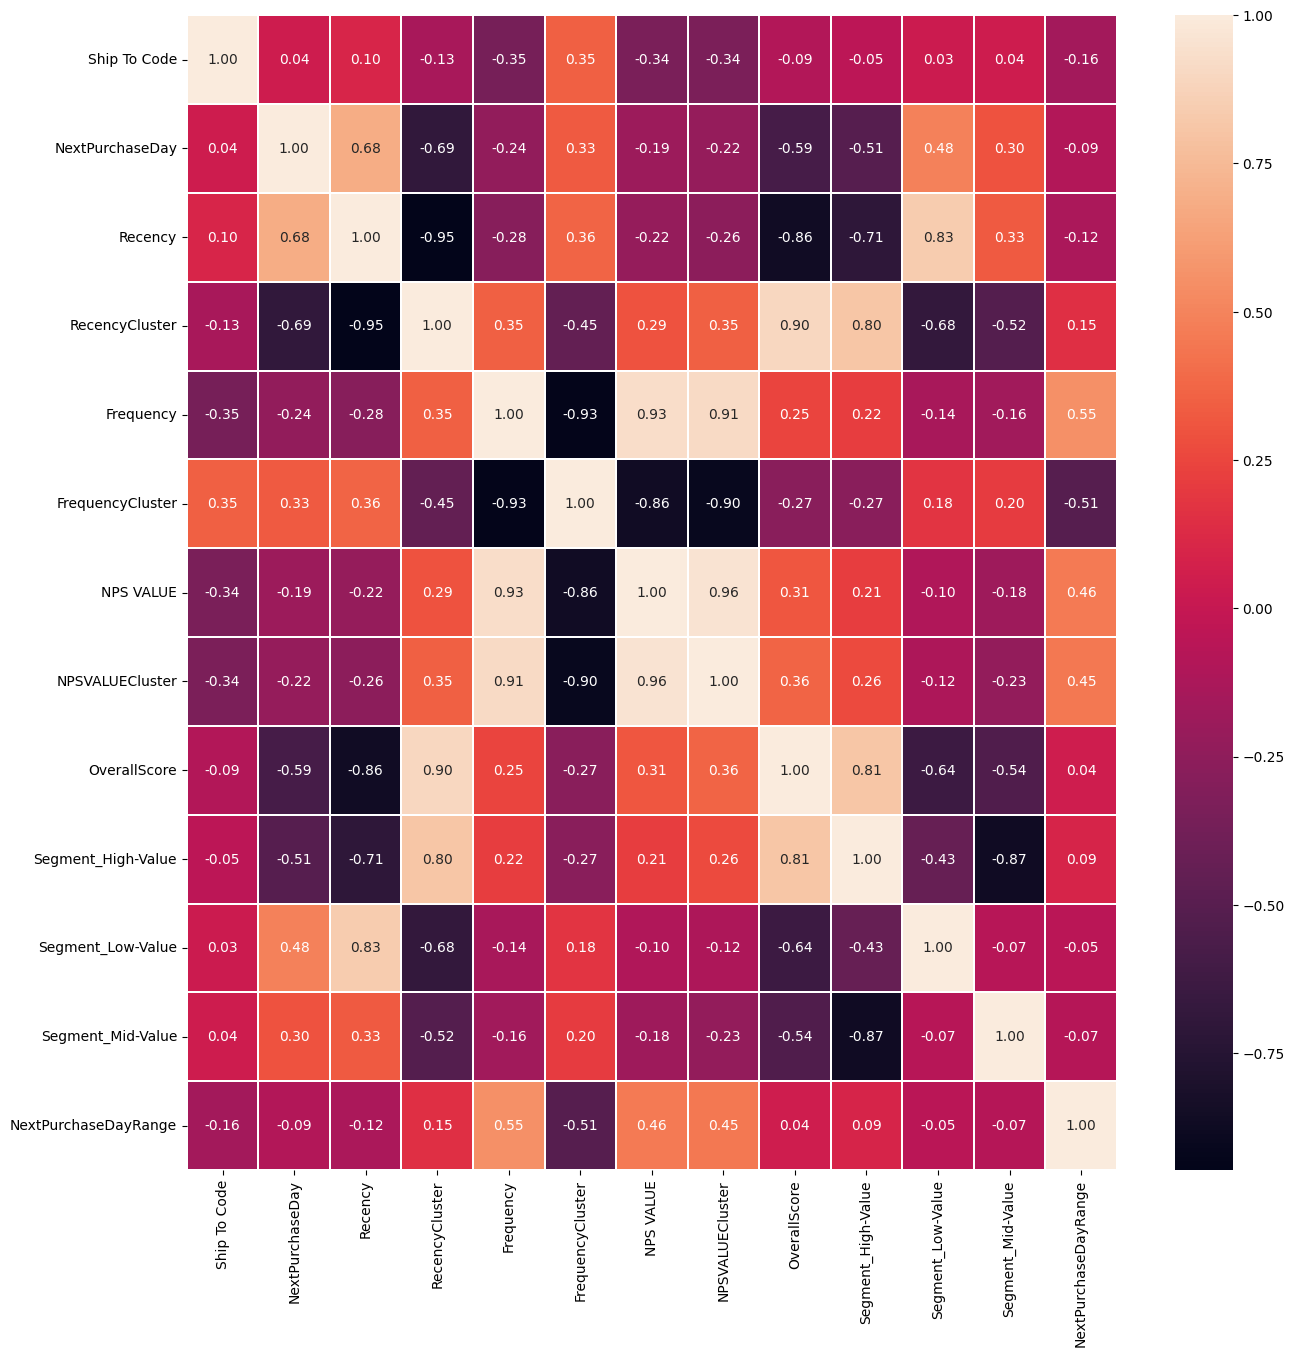

In [118]:
plt.figure(figsize = (15, 15))
sns.heatmap(corr_matrix, annot = True, linewidths=0.2, fmt=".2f");

<a id='building-machine-learning-models'></a>
## Building Machine Learning Models

In [119]:
ctm_class = ctm_class.drop('NextPurchaseDay', axis=1)

In [120]:
X, y = ctm_class.drop('NextPurchaseDayRange', axis=1), ctm_class.NextPurchaseDayRange
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=None, shuffle=True)

In [122]:
# Create an array of models
models = []
models.append(("LogisticRegression", LogisticRegression()))
models.append(("GaussianNB", GaussianNB()))
models.append(("RandomForestClassifier", RandomForestClassifier()))
models.append(("SVC", SVC()))
models.append(("DecisionTreeClassifier", DecisionTreeClassifier()))
models.append(("xgb.XGBClassifier", xgb.XGBClassifier(eval_metric='mlogloss')))
models.append(("KNeighborsClassifier", KNeighborsClassifier()))

In [123]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import pandas as pd
import numpy as np
import time

# Create an array of models
models = []
models.append(("LogisticRegression", LogisticRegression()))
models.append(("GaussianNB", GaussianNB()))
models.append(("RandomForestClassifier", RandomForestClassifier()))
models.append(("SVC", SVC()))
models.append(("DecisionTreeClassifier", DecisionTreeClassifier()))
models.append(("xgb.XGBClassifier", xgb.XGBClassifier(eval_metric='mlogloss')))
models.append(("KNeighborsClassifier", KNeighborsClassifier()))

# A dictionary for all the distinct models and their respective metrics
model_scores_dict = {'model_name': [],
                     'accuracy': [],
                     'f1_score': [],
                     'recall': [],
                     'precision': [],
                     'time': []
                    }

# For each model name and model in models
for model_name, model in models:

    # Add model_name to model_scores_dict
    model_scores_dict['model_name'].append(model_name)

    kfold = KFold(n_splits=2, random_state=24, shuffle=True)
    start = time.time()

    # Perform cross-validation and get scores
    cv_accuracy = np.mean(cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy'))
    cv_f1_score = np.mean(cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1_macro'))
    cv_recall = np.mean(cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall_macro'))
    cv_precision = np.mean(cross_val_score(model, X_train, y_train, cv=kfold, scoring='precision_macro'))

    # Update model_scores_dict with scores for model_name
    model_scores_dict['accuracy'].append(cv_accuracy)
    model_scores_dict['f1_score'].append(cv_f1_score)
    model_scores_dict['recall'].append(cv_recall)
    model_scores_dict['precision'].append(cv_precision)
    model_scores_dict['time'].append(time.time() - start)

# Create DataFrame from model_scores_dict
model_score_df = pd.DataFrame(model_scores_dict).set_index("model_name")

# Sort DataFrame by accuracy, f1_score, and time
sorted_model_score_df = model_score_df.sort_values(by=["accuracy", "f1_score", "time"], ascending=False)

# Display sorted DataFrame
sorted_model_score_df


,accuracy,f1_score,recall,precision,time
model_name,,,,,
xgb.XGBClassifier,0.936190,0.701816,0.663229,0.810640,0.459910
RandomForestClassifier,0.932222,0.706730,0.681961,0.780408,1.230267
KNeighborsClassifier,0.932159,0.593362,0.571429,0.715919,0.115193
DecisionTreeClassifier,0.924286,0.701199,0.709161,0.734827,0.052697
LogisticRegression,0.920349,0.617381,0.587710,0.760724,0.122809
SVC,0.920254,0.529130,0.531513,0.547138,0.088527
GaussianNB,0.904508,0.640952,0.616660,0.703311,0.051900


Let's see how we could improve the existing model `XGB` by finding suitable parameters via the process of hyperparameter tuning using `GridSearchCV`. We will check if the improved `XGB Classifier` model outperforms the `LogisticRegression` model.

In [124]:
parameter = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,5,2)
    }

p_grid_search = GridSearchCV(estimator = xgb.XGBClassifier(eval_metric='mlogloss'),
                             param_grid = parameter,
                             scoring='accuracy',
                             n_jobs=-1,
                             #iid=False,
                             cv=2
                            )

p_grid_search.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 5, 2)},
             scoring='accuracy')

In [125]:
p_grid_search.best_params_, p_grid_search.best_score_

({'max_depth': 3, 'min_child_weight': 3}, 0.9561904761904761)

In [126]:
refined_xgb_model = xgb.XGBClassifier(eval_metric='logloss',
                                      max_depth=list(p_grid_search.best_params_.values())[0]-1,
                                      min_child_weight=list(p_grid_search.best_params_.values())[-1]+4
                                     ).fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'.format(refined_xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'.format(refined_xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 0.92
Accuracy of XGB classifier on test set: 0.94


As we can see, the improved `XGB classifier` model is accurate than the `LogisticRegression` model by $0.1$.

Let us go ahead and predict with these two models.

In [127]:
ref_xgb_pred_y = refined_xgb_model.predict(X_test)
ref_xgb_pred_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [128]:
log_reg_pred_y = LogisticRegression().fit(X_train, y_train).predict(X_test)
log_reg_pred_y

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Let compute the confusion matrices of these two models with the user-defined function `get_confusion_matrix` defined below.

In [129]:
def get_confusion_matrix(y_test, y_pred):
    """
    Displays the confusion matrix of the input numpy arrays y_test and y_pred.

    INPUT:
        y_test - A numpy array
        y_pred - A numpy array

    OUTPUT:
        NoneType
    """

    data = {'y_Actual': y_test, 'y_Predicted': y_pred}

    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    conf_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'],
                              rownames=['Actual'],
                              colnames=['Predicted'])

    sns.heatmap(conf_matrix, annot=True, fmt = "d", cmap="Spectral")
    plt.show()

Let's get the confusion matrix for `y_test` and `ref_xgb_pred_y`, i.e., for the improved `XGB classifier` model and `y_test` and `log_reg_pred_y`, i.e., for the `LogisticRegression` model.

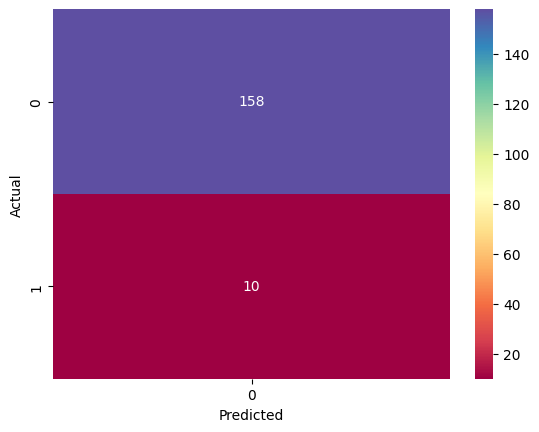

In [130]:
get_confusion_matrix(np.array(y_test), ref_xgb_pred_y)

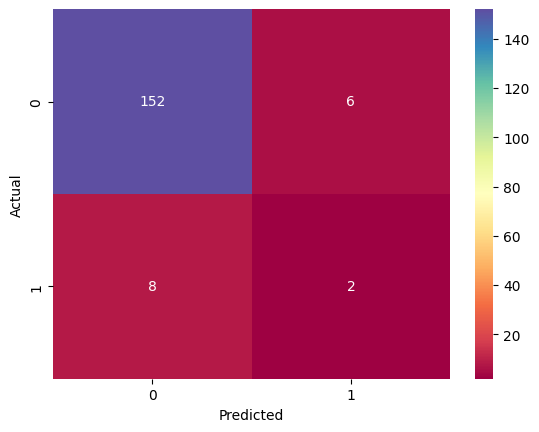

In [131]:
get_confusion_matrix(np.array(y_test), log_reg_pred_y)

Let's check if the refined `XGB Classifier` outperforms the `LogisticRegression` for the other metrics.

In [132]:
# A dictionary of model names with the various metrics
ref_xgb_log_reg_dict = {"model_name" : ["xgb.XGBClassifier", "LogisticRegression"],
                        "accuracy"   : [accuracy_score(y_test, ref_xgb_pred_y), accuracy_score(y_test, log_reg_pred_y)],
                        "f1_score"   : [f1_score(y_test, ref_xgb_pred_y), f1_score(y_test, log_reg_pred_y)],
                        "recall"     : [recall_score(y_test, ref_xgb_pred_y), recall_score(y_test, log_reg_pred_y)],
                        "precision"  : [precision_score(y_test, ref_xgb_pred_y), precision_score(y_test, log_reg_pred_y)]
                       }

# Create a dataframe with ref_xgb_log_reg_dict
ref_xgb_log_reg_df = pd.DataFrame(ref_xgb_log_reg_dict).set_index("model_name")

# Order the dataframe ref_xgb_log_reg_df by the metric values in increasing order
ref_xgb_log_reg_df.sort_values(by=["accuracy", "f1_score", "recall", "precision"], ascending=False)

,accuracy,f1_score,recall,precision
model_name,,,,
xgb.XGBClassifier,0.940476,0.000000,0.0,0.00
LogisticRegression,0.916667,0.222222,0.2,0.25


It is obvious from the output in the cell above that for each metric, ${\rm accuracy}$, $F_{1}-{\rm score}$, ${\rm recall}$, and ${\rm precision}$, the improved or refined `XGB classifier` model out performs the `LogisticRegression` model. Thus, we will choose the refined `XGB classifier` model over the `LogisticRegression` model.